In [10]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Create Toy Dataset

In [11]:
# Define parameters
nb_points = 100

il faut échantilloner des y dans la boule pour un x donné

In [12]:
eps = 1
L = 1

# Create bounding functions

In [13]:
def get_bounds_from_ball(epsilon,x,W,b):
    #### Starting from an input domain B(x, epsilon), we want to minimize and maximize a linear function Wx + b
    # epsilon scalar value
    # x (4,)
    # W (4,)
    # b scalar
    output = W@x - epsilon*np.linalg.norm(W) + b, W@x + epsilon*np.linalg.norm(W) + b # scalar
    return np.array(output) #(1,)

In [14]:
def square_backward_bounds(l, u, y):
    # l (4,)
    # u (4,)
    # y (4,)

    u = u - y
    l = l - y

    W = u + l #(4,)
    b = np.sum(-u*l) - W@y #scalar
    return W, np.array(b)[None]#(4,) & (1,)

In [15]:
def sqrt_backward_bounds(l,u, W_previous, b_previous):
    #stocker h'
    c = (l+u)/2
    W = W_previous*(1/(2*np.sqrt(c)))
    b = 0.5* np.sqrt(c) + (1/(2*np.sqrt(c)))*b_previous
    return W, b

In [16]:
def get_max(W,b,y):
    return minimize(lambda x: W @ x + b, y)

# Test 1D

In [17]:
def f(x):
    return np.sin(x)

In [18]:
num_coordinates = 1

x = np.random.rand(nb_points, num_coordinates)*10-5

In [19]:
def echantillonner_boule_l2_simple(x, epsilon):
  d = x.shape[0] # Dimension

  # 1. Vecteur gaussien aléatoire (direction)
  u = np.random.randn(d)
  norm_u = np.linalg.norm(u)

  
  # 2. Distance radiale (avec échelle pour uniformité en volume)
  s = np.random.rand() # Échantillon uniforme dans [0, 1)
  r = epsilon * s 

  # 3. Point final = centre + direction_normalisée * distance
  y = x + r * (u / norm_u)

  return y

In [20]:
nb_points = 50
eps = 1
pt_choosen=8

In [21]:
x[pt_choosen] = 0.69633518

In [22]:
y_list = []
for i in range(nb_points):
    y_list.append(echantillonner_boule_l2_simple(x[pt_choosen], eps))
y_list.append(x[pt_choosen])

In [23]:
l = x[pt_choosen]-eps
u = x[pt_choosen]+eps

In [24]:
W_list = []
b_list = []
for y_i in y_list:
    W_1, b_1 = square_backward_bounds(l,u,y_i)
    W_list.append(W_1)
    b_list.append(b_1)

In [25]:
z = np.linspace(x[pt_choosen]-eps, x[pt_choosen]+eps, 1000)

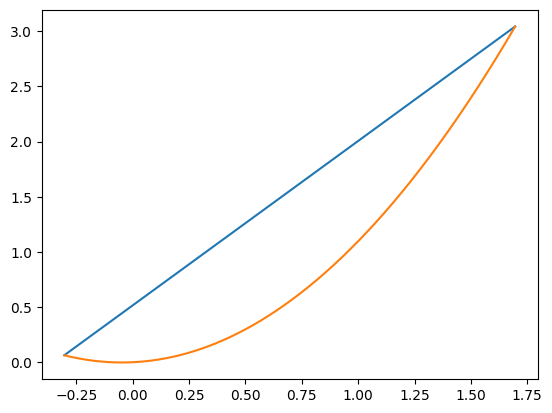

In [26]:
plt.plot(z, W_list[5]*z+b_list[5])
plt.plot(z, np.square(z-y_list[5]))
plt.show()

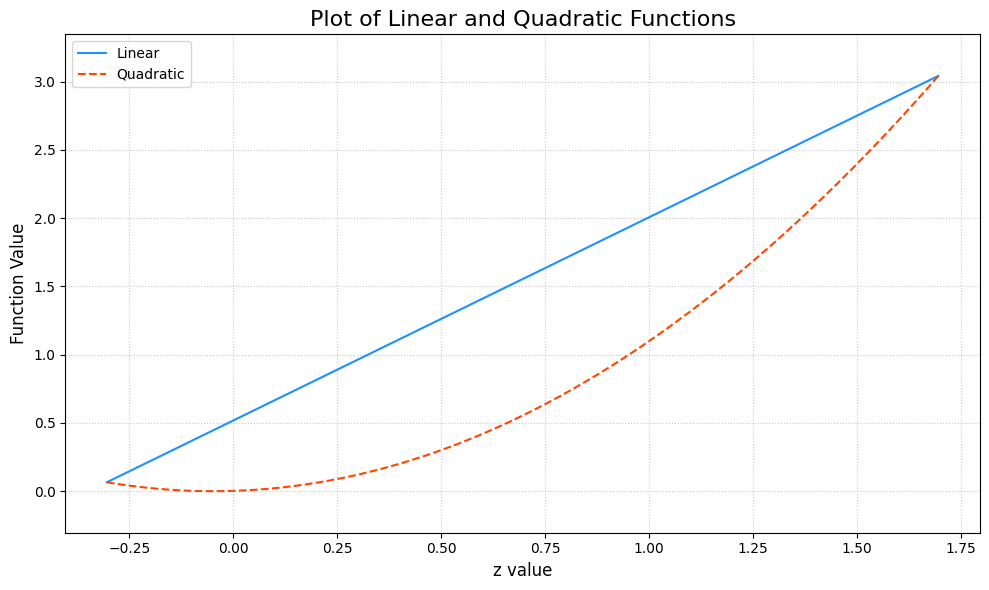

In [38]:
# --- Plotting in the same improved style ---
plt.figure(figsize=(10, 6)) # 1. Adjust figure size

# 2. Plot data with distinct colors, styles, and add labels for the legend
plt.plot(z, W_list[5]*z+b_list[5], label='Linear', color='dodgerblue', linestyle='-')
plt.plot(z, np.square(z-y_list[5]), label='Quadratic', color='orangered', linestyle='--')

# 3. Add a title and axis labels
plt.title('Plot of Linear and Quadratic Functions', fontsize=16)
plt.xlabel('z value', fontsize=12)
plt.ylabel('Function Value', fontsize=12)

# 4. Add a legend to identify the lines
plt.legend(fontsize=10)

# 5. Add a grid for easier reading of values
plt.grid(True, linestyle=':', alpha=0.7) # Slightly different grid style for variety

# 6. Optionally, set x and y limits if needed
# Determine appropriate y-limits based on the data to ensure both functions are visible
min_y_val = min(np.min(W_list[5]*z+b_list[5]), np.min(np.square(z-y_list[5])))
max_y_val = max(np.max(W_list[5]*z+b_list[5]), np.max(np.square(z-y_list[5])))
padding = (max_y_val - min_y_val) * 0.1 # Add 10% padding
plt.ylim([min_y_val - padding, max_y_val + padding])
# plt.xlim([np.min(z), np.max(z)]) # z limits are usually fine if z is well-defined

# 7. Ensure layout is tight
plt.tight_layout()

# 8. Show the plot
plt.show()

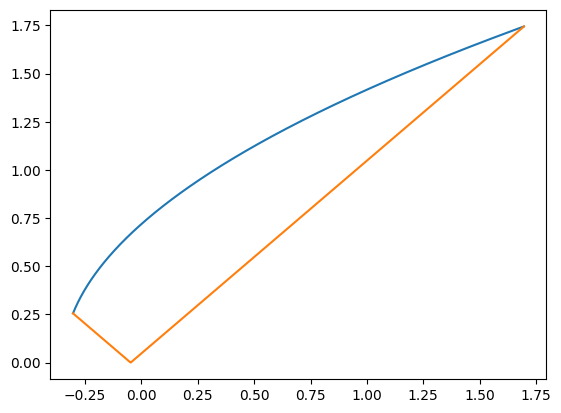

In [27]:
plt.plot(z, np.sqrt(W_list[5]*z+b_list[5]))
plt.plot(z, np.sqrt(np.square(z-y_list[5])))
plt.show()

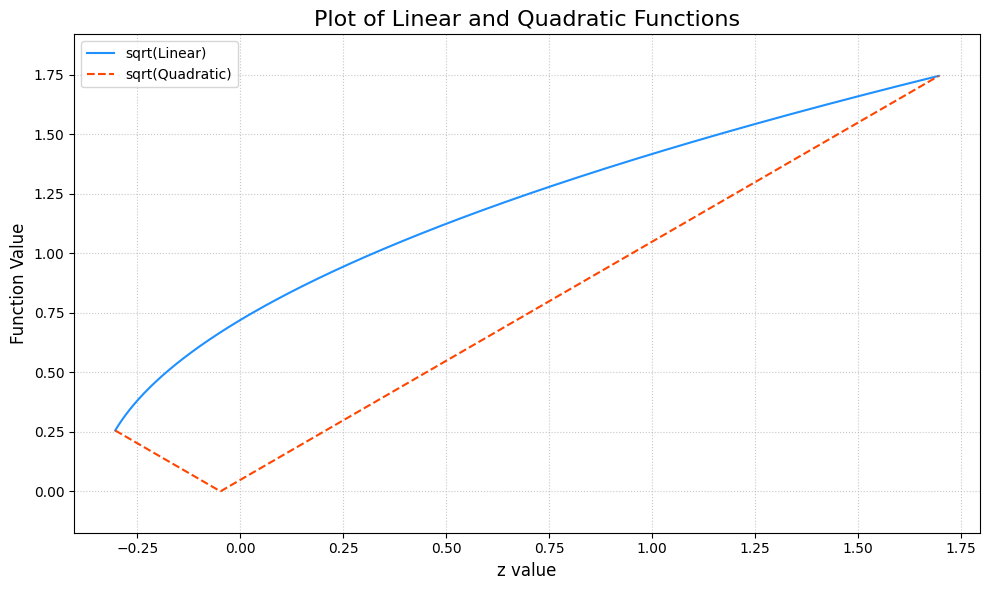

In [40]:
# --- Plotting in the same improved style ---
plt.figure(figsize=(10, 6)) # 1. Adjust figure size

# 2. Plot data with distinct colors, styles, and add labels for the legend
plt.plot(z, np.sqrt(W_list[5]*z+b_list[5]), label='sqrt(Linear)', color='dodgerblue', linestyle='-')
plt.plot(z, np.sqrt(np.square(z-y_list[5])), label='sqrt(Quadratic)', color='orangered', linestyle='--')

# 3. Add a title and axis labels
plt.title('Plot of Linear and Quadratic Functions', fontsize=16)
plt.xlabel('z value', fontsize=12)
plt.ylabel('Function Value', fontsize=12)

# 4. Add a legend to identify the lines
plt.legend(fontsize=10)

# 5. Add a grid for easier reading of values
plt.grid(True, linestyle=':', alpha=0.7) # Slightly different grid style for variety

# 6. Optionally, set x and y limits if needed
# Determine appropriate y-limits based on the data to ensure both functions are visible
min_y_val = min(np.min(np.sqrt(W_list[5]*z+b_list[5])), np.min(np.sqrt(np.square(z-y_list[5]))))
max_y_val = max(np.max(np.sqrt(W_list[5]*z+b_list[5])), np.max(np.sqrt(np.square(z-y_list[5]))))
padding = (max_y_val - min_y_val) * 0.1 # Add 10% padding
plt.ylim([min_y_val - padding, max_y_val + padding])
# plt.xlim([np.min(z), np.max(z)]) # z limits are usually fine if z is well-defined

# 7. Ensure layout is tight
plt.tight_layout()

# 8. Show the plot
plt.show()

In [28]:
min_z = np.zeros(shape = (z.shape[0],len(y_list)))
for i in range(z.shape[0]):
    for j in range(len(y_list)):
    # min_1_z.append(np.min(np.array((f(y_list[0]) + L*np.sqrt(W_list[0]*z_i+b_list[0]), f(y_list[1]) + L*np.sqrt(W_list[1]*z_i+b_list[1]), f(y_list[2]) + L*np.sqrt(W_list[2]*z_i+b_list[2])))))
        min_z[i,j] = np.array((f(y_list[j]) + L*np.sqrt(W_list[j]*z[i]+b_list[j])))
        # min_3_z.append(np.array((f(y_list[3]) + L*np.sqrt(W_list[3]*z_i+b_list[3]))))
        # min_4_z.append(np.array((f(y_list[1]) + L*np.sqrt(W_list[1]*z_i+b_list[1]))))

/tmp/ipykernel_10324/3779735209.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  min_z[i,j] = np.array((f(y_list[j]) + L*np.sqrt(W_list[j]*z[i]+b_list[j])))


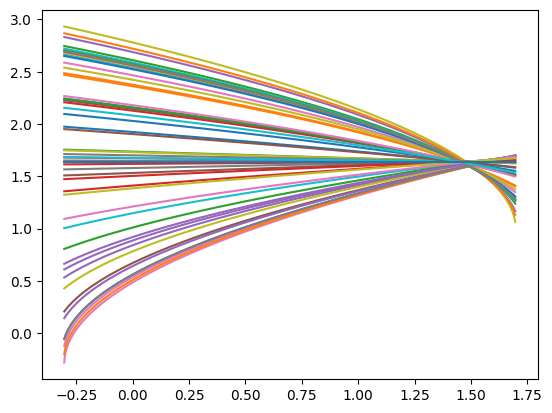

In [41]:
for j in range(len(y_list)):
    plt.plot(z, min_z[:,j])

In [30]:
import pdb

In [31]:
def function_to_optimize_all(x, W_list, b_list, y_list, f, L=1):
    # x (4,)
    outputs = []
    for i in range(len(y_list)):
        # if (W_list[i]*x+b_list[i])<0:
        #     pdb.set_trace()
        
        output = f(y_list[i]) +\
          L*np.sqrt(W_list[i]*x+b_list[i]) #scalar
        outputs.append(output)
        
    # print(output.shape)
    return np.min(outputs)

In [32]:
def lip_certificate(x, eps, f, L=1):
    return f(x) + np.abs(eps)

In [33]:
def function_lip_certificate_yi(x, y_list, f, L=1):
    # x (4,)
    outputs = []
    for i in range(len(y_list)):
        output = f(y_list[i]) +\
          L*np.sqrt(np.square(x-y_list[i]))
        outputs.append(output)
        
    # print(output.shape)
    return np.min(outputs)

In [43]:
function_z = []
function_lip = []
for z_i in z:
    function_z.append(function_to_optimize_all(z_i, W_list[5], b_list[5], y_list[5], f))
    function_lip.append(function_lip_certificate_yi(z_i, y_list, f))

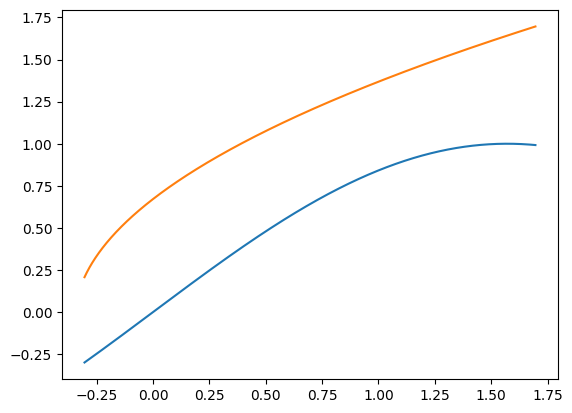

In [45]:
plt.plot(z, f(z))
plt.plot(z, function_z)
# plt.plot(z, function_lip)
# plt.axhline(y = lip_certificate(x[pt_choosen], eps, f))
plt.show()

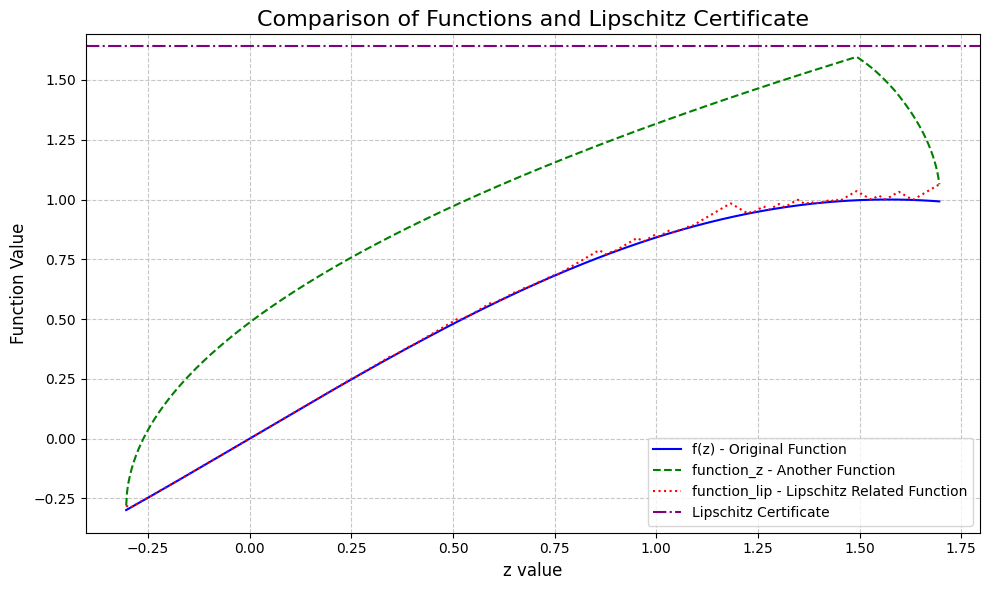

In [37]:
# --- Plotting ---
plt.figure(figsize=(10, 6)) # 1. Adjust figure size for better readability

# 2. Plot data with distinct colors, styles, and add labels for the legend
plt.plot(z, f(z), label='f(z) - Original Function', color='blue', linestyle='-')
plt.plot(z, function_z, label='function_z - Another Function', color='green', linestyle='--')
plt.plot(z, function_lip, label='function_lip - Lipschitz Related Function', color='red', linestyle=':')

# 3. Plot horizontal line with a label and distinct style
plt.axhline(y=lip_certificate(x[pt_choosen], eps, f), color='purple', linestyle='-.', label='Lipschitz Certificate')

# 4. Add a title and axis labels
plt.title('Comparison of Functions and Lipschitz Certificate', fontsize=16)
plt.xlabel('z value', fontsize=12)
plt.ylabel('Function Value', fontsize=12)

# 5. Add a legend to identify the lines
plt.legend(fontsize=10)

# 6. Add a grid for easier reading of values
plt.grid(True, linestyle='--', alpha=0.7)

# 7. Optionally, set x and y limits if needed to focus on a specific region
# plt.xlim([min_z, max_z])
# plt.ylim([min_val, max_val])

# 8. Add annotations if there are specific points of interest
# Example: Annotate the chosen point for the certificate
# plt.scatter(x_pt_choosen_val, f(x_pt_choosen_val), color='black', zorder=5, label=f'Point for certificate (x={x_pt_choosen_val})')
# plt.annotate(f'Certificate Point ({x_pt_choosen_val:.2f}, {f(x_pt_choosen_val):.2f})',
#              xy=(x_pt_choosen_val, f(x_pt_choosen_val)),
#              xytext=(x_pt_choosen_val + 0.5, f(x_pt_choosen_val) + 5), # Adjust offset as needed
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=9)
# Re-enable legend if you add scatter plot with label
# plt.legend(fontsize=10)


# 9. Ensure layout is tight to prevent labels from being cut off
plt.tight_layout()

# 10. Show the plot
plt.show()

In [27]:
# def jac_function_to_optimize(x, W, b, y):
#     output = L/(2*np.sqrt(W@x+b))*W
#     # print(output.shape)
#     return output                             ##### TODO

In [28]:
def unit_ball_constraint(x, x_ball_center, eps):
    return eps**2 - np.linalg.norm(x - x_ball_center)**2

def jacobian_unit_ball_constraint(x, x_ball_center, eps):
    """
    Jacobien (gradient) de la fonction unit_ball_constraint.
    Retourne -x / ||x||_2.
    Non défini à x = 0.
    """
    # norm_x = np.linalg.norm(x)
    # return -x / norm_x
    return -2*(x - x_ball_center)

In [29]:
x_ball_center = x[pt_choosen]
args_constraint = (x_ball_center, eps)
# Set up the constraint dictionary
constraints = ({
    'type': 'ineq',  # Inequality constraint: constraint(x) >= 0
    'fun': unit_ball_constraint,
    'jac': jacobian_unit_ball_constraint,
    'args': args_constraint
})

# Run the optimizer
result = minimize(fun=lambda x :-function_to_optimize_all(x, W_list, b_list, y_list, f), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# attention, le maximum est - result
# Display results
if result.success:
    print("max found at:", result.x)
    print("max value:", -result.fun)
else:
    print("Optimization failed:", result.message)

max found at: [1.49314876]
max value: 1.5968738081396472


/tmp/ipykernel_15368/4073067223.py:9: RuntimeWarning: invalid value encountered in sqrt
  L*np.sqrt(W_list[i]*x+b_list[i]) #scalar


In [72]:
def pyiavski(x, f, eps, L=1, n_iter = 10):
    #start from a point
    y_list=[echantillonner_boule_l2_simple(x, eps)]
    W_list = []
    b_list = []
    #define bounds
    l = x-eps
    u = x+eps
    for i in range(n_iter):
        #define linear bounds for the square relaxation
        
        W, b = square_backward_bounds(l,u,y_list[-1])
        W_list.append(W)
        b_list.append(b)
        
        x_ball_center = x
        
        args_constraint = (x_ball_center, eps)
        # Set up the constraint dictionary
        constraints = ({
            'type': 'ineq',  # Inequality constraint: constraint(x) >= 0
            'fun': unit_ball_constraint,
            'jac': jacobian_unit_ball_constraint,
            'args': args_constraint
        })

        # Run the optimizer
        result = minimize(fun=lambda x :-function_to_optimize_all(x, W_list, b_list, y_list, f), x0 = x_ball_center, method='SLSQP', constraints=constraints)
        # attention, le maximum est - result
        # Display results
        if result.success:
            argmax = result.x
            max = -result.fun
            y_list.append(argmax)
        else:
            print("Optimization failed:", result.message)
            break
    return argmax, max, W_list, b_list, y_list[:-1]   

In [73]:
argmax, max, W_list, b_list, y_list   = pyiavski(x[pt_choosen],f,eps, n_iter=100)

/tmp/ipykernel_15368/4073067223.py:9: RuntimeWarning: invalid value encountered in sqrt
  L*np.sqrt(W_list[i]*x+b_list[i]) #scalar


In [74]:
len(y_list)

100

In [75]:
function_py = []
for z_i in z:
    function_py.append(function_to_optimize_all(z_i, W_list, b_list, y_list, f))
  

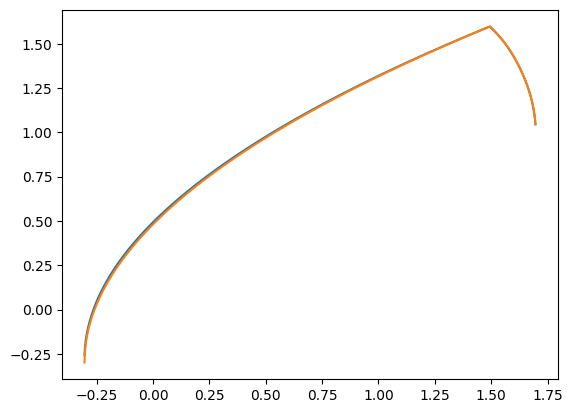

In [77]:
# plt.plot(z, f(z))
plt.plot(z, function_z)
# plt.plot(z, function_lip)
plt.plot(z, function_py)
# plt.axhline(y = lip_certificate(x[pt_choosen], eps, f))
plt.show()

# Test 4D

In [47]:
pt_choosen = 1
num_coordinates = 4

x = np.random.rand(nb_points, num_coordinates)*10-5

In [48]:
def f(x):
    # x shape(4,)
    output = x[0]*x[1]**2+x[2]-x[3] #f(scalar
    return np.array(output)[None]#(batch,1)

In [49]:
lower_toy = x-eps
upper_toy = x+eps

In [50]:
y = echantillonner_boule_l2_simple(x[pt_choosen], eps)

In [51]:
y.shape

(4,)

In [52]:
W_1, b_1 = square_backward_bounds(lower_toy[pt_choosen], upper_toy[pt_choosen],y)

In [53]:
import numpy as np
from scipy.optimize import minimize

In [54]:
def function_to_optimize(x, W, b, y):
    # x (4,)
    output = f(y) + L*np.sqrt(W@x+b) #scalar
    # print(output.shape)
    return output

In [55]:
def jac_function_to_optimize(x, W, b, y):
    output = L/(2*np.sqrt(W@x+b))*W
    # print(output.shape)
    return output

In [56]:
x[pt_choosen-1], x[pt_choosen]

(array([-1.18873416, -2.22194128, -3.24914209, -3.71938265]),
 array([-3.87544472, -2.89726206, -0.42228951,  0.14701526]))

In [57]:
# # Define your convex function
# def f(x):
#     # Example: quadratic function
#     return np.dot(x, x) + 3 * x[0] - x[1]  # Replace with your actual function
x_ball_center = x[pt_choosen]
# Define the constraint: ||x - x_centre||_2**2 <= eps**2
def unit_ball_constraint(x, x_ball_center, eps):
    return eps**2 - np.linalg.norm(x - x_ball_center)**2

def jacobian_unit_ball_constraint(x, x_ball_center, eps):
    """
    Jacobien (gradient) de la fonction unit_ball_constraint.
    Retourne -x / ||x||_2.
    Non défini à x = 0.
    """
    # norm_x = np.linalg.norm(x)
    # return -x / norm_x
    return -2*(x - x_ball_center)

args_constraint = (x_ball_center, eps)
# Set up the constraint dictionary
constraints = ({
    'type': 'ineq',  # Inequality constraint: constraint(x) >= 0
    'fun': unit_ball_constraint,
    'jac': jacobian_unit_ball_constraint,
    'args': args_constraint
})

# Run the optimizer
result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), jac= lambda x :-jac_function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# attention, le maximum est - result
# Display results
if result.success:
    print("max found at:", result.x)
    print("max value:", -result.fun)
else:
    print("Optimization failed:", result.message)

max found at: [-4.46069937 -4.44915142  0.69096902  0.04816253]
max value: -10.00861755473723


In [58]:
function_to_optimize(result.x, W_1, b_1, y)

array([-10.00861755])

In [59]:
x_ball_center

array([-3.87544472, -2.89726206, -0.42228951,  0.14701526])

In [60]:
unit_ball_constraint(result.x, x_ball_center, eps)

-1.7997171752881513e-08

In [61]:
np.linalg.norm(result.x-x_ball_center)

2.000000004499293

In [62]:
result.message

'Optimization terminated successfully'

# Application to our NN

In [63]:
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import keras.ops as K
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam
from keras.metrics import BinaryAccuracy

# from keras.models import Sequential
from deel.lip.model import Sequential

from deel.lip.layers import (
    SpectralDense,
    SpectralConv2D,
    ScaledL2NormPooling2D,
    FrobeniusDense,
)
from deel.lip.activations import GroupSort, GroupSort2
from deel.lip.losses import HKR, KR, HingeMargin, MulticlassHKR, MulticlassKR

import numpy as np
import decomon

from data_processing import load_data, select_data_for_radius_evaluation_MNIST08
from radius_evaluation_tools import compute_binary_certificate, starting_point_dichotomy

In [64]:
x_train, x_test, y_train, y_test, y_test_ord = load_data("MNIST08")

In [65]:
model_path = "/home/aws_install/robustess_project/lip_models/demo3_FC_vanilla_MNIST08_channelfirst_False_disj_Neurons_single_output.keras"
model = keras.models.load_model(model_path)
model.compile(
   
    loss=HKR(
        alpha=10.0, min_margin=1.0
    ),  # HKR stands for the hinge regularized KR loss
    metrics=[
        # KR,  # shows the KR term of the loss
        HingeMargin(min_margin=1.0),  # shows the hinge term of the loss
    ],
    optimizer=Adam(learning_rate=0.001),)

/home/aws_install/miniconda3/envs/k3torchenv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [66]:
pt_choosen = 1

In [67]:
x = x_train[pt_choosen:pt_choosen+1].flatten()

In [68]:
eps=0.2

In [69]:
lower_toy = x-eps
upper_toy = x+eps

In [70]:
y = echantillonner_boule_l2_simple(x, eps)

In [71]:
W_1, b_1 = square_backward_bounds(lower_toy, upper_toy,y)

In [72]:
def function_to_optimize(x, W, b, y):
    # x (4,)
    output = model(y.reshape((1,28,28))[None]).cpu().detach().numpy()[0,0] + L*np.sqrt(W@x+b) #scalar
    # print(output.shape)
    return output

In [73]:
def jac_function_to_optimize(x, W, b, y):
    output = L/(2*np.sqrt(W@x+b))*W
    # print(output.shape)
    return output

In [74]:
# # Define your convex function
# def f(x):
#     # Example: quadratic function
#     return np.dot(x, x) + 3 * x[0] - x[1]  # Replace with your actual function
x_ball_center = x
x_ball_center = np.asarray(x_ball_center, dtype=np.float64)

# Define the constraint: ||x - x_centre||_2**2 <= eps**2
def unit_ball_constraint(x, x_ball_center, eps):
    return eps**2 - np.linalg.norm(x - x_ball_center)**2

def jacobian_unit_ball_constraint(x, x_ball_center, eps):
    """
    Jacobien (gradient) de la fonction unit_ball_constraint.
    Retourne -x / ||x||_2.
    Non défini à x = 0.
    """
    # norm_x = np.linalg.norm(x)
    # return -x / norm_x
    return -2*(x - x_ball_center)

args_contrainte = (x_ball_center, eps)
# Set up the constraint dictionary
constraints = ({
    'type': 'ineq',  # Inequality constraint: constraint(x) >= 0
    'fun': unit_ball_constraint,
    'jac': jacobian_unit_ball_constraint,
    'args': args_contrainte
})

# Run the optimizer
result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), jac= lambda x :-jac_function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# attention, le maximum est - result
# Display results
if result.success:
    print("max found at:", result.x)
    print("max value:", -result.fun)
else:
    print("Optimization failed:", result.message)

max found at: [-1.21147877e-02  8.45474913e-03 -7.24121810e-04 -1.78846386e-02
  2.61420232e-03 -3.12169171e-03  6.82198734e-03 -9.94615989e-03
 -1.44907635e-02 -1.61198142e-03  5.78071243e-03  1.64451628e-03
  3.75404428e-03  3.13888133e-03  1.22157004e-02 -1.07756986e-03
 -8.61255384e-03 -2.04849971e-04 -2.23366242e-03 -3.89761707e-03
  2.09730747e-04  2.69681227e-03  3.98610323e-03  3.33426962e-03
  4.77898361e-03  7.66073236e-06  1.01144859e-02  1.21964201e-02
 -3.67534513e-03 -7.14613580e-03 -8.83746704e-04 -1.20618705e-02
 -1.36352919e-02 -8.53149812e-03  7.15150389e-03 -6.06440986e-04
 -1.22012248e-02 -8.29162411e-03 -1.36569133e-03 -1.10672897e-02
  4.36353725e-03 -1.05469701e-02  3.35315099e-04 -7.75636082e-04
 -2.27334079e-03 -1.16845185e-02  9.09654423e-03 -1.10150115e-02
  2.79869346e-03  8.16837461e-03  9.50995461e-03 -6.65584473e-03
 -5.31713494e-03 -3.26466507e-03  1.73373829e-03 -1.00725533e-02
 -7.28123744e-04  2.21252793e-03  2.19483357e-04  5.89323542e-03
 -7.2015597

In [75]:
model(x.reshape((1,28,28))[None,:])

tensor([[-3.8370]], device='cuda:0', grad_fn=<MmBackward0>)

In [76]:
model(x_train[pt_choosen:pt_choosen+1])

tensor([[-3.8370]], device='cuda:0', grad_fn=<MmBackward0>)